In [11]:
import os
from ctrace.constraint import load_graph, find_contours
from contact_tracing import PQ
from contact_tracing import *
from ctrace.constraint import ProbMinExposed, ProbMinExposedMIP
from ctrace.draw import draw_prob
os.getcwd()

'/home/zach/Documents/prog/research/ContactTracing/ctrace'

In [12]:
LOADING = True
np.random.seed(42)

In [13]:
# Setup graph and infected sets
if LOADING:
    G = load_graph("montgomery")
else:
    G = nx.balanced_tree(4, 3)

# Randomly sample 5% of infected
N = G.number_of_nodes()
num_infected = int(N * 0.004)
I = np.random.choice(N, num_infected, replace=False)

# Find contours
contour1, contour2 = find_contours(G, I)

# Set K value
K = int(0.8 * len(I))

# Find the infected probabilities
p1, q = PQ(G, I)

In [4]:
# print(f"K: {K}")
# print(f"I: {I}")

K: 3
I: [78  0 68 22]


In [14]:
constraintMIP = ProbMinExposedMIP.from_dataframe(G, I, contour1, contour2, p1, q, K)

In [16]:
constraintMIP.solve_lp()


In [17]:
sol = constraintMIP.getVariables()

In [18]:
sol.sum()

240.0

In [19]:
quarantined = constraintMIP.quarantined_solution
saved = constraintMIP.saved_solution

In [20]:
p1.keys()

Index(['v', 'p_v'], dtype='object')

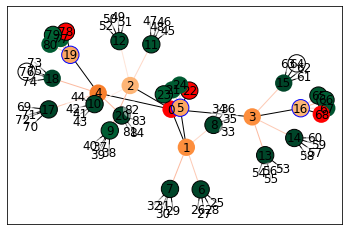

In [10]:
# draw_prob(G, I, contour1, contour2, quarantined, saved, constraintMIP.p1, constraintMIP.q)
